# Ejercicios Recuperación Aprendizaje Automático.

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# 1. Segmentación de datos de redes sociales. (20 puntos)
En el archivo “snsdata.csv” se encuentra los términos más utilizados en unos 30.000 perfiles aleatorios de adolescentes de una red social. Importar el archivo y separar el conjunto de datos en dos según el género de los usuarios (F y M). En cada uno de los subconjuntos de datos eliminar el año de graduación ('gradyear'), el género ('gender') y la edad (‘age’).  Utilizando el algoritmo de k-means identificar el número de segmentos óptimos en los que se divide cada subconjunto de datos y obtener los valores de los centroides.

In [2]:
import pandas as pd

sns_data = pd.read_csv('snsdata.csv', sep = ',')

En primer lugar, como indica en el enunciado, se ha de separar el conjunto en base al género ('F' y 'M') y eliminar las columnas año de graduación ('gradyear'), el género ('gender') y la edad ('age').

In [3]:
sns_data_F = sns_data[sns_data.gender == 'F']
sns_data_M = sns_data[sns_data.gender == 'M']

col_names = list(sns_data.columns)
col_names.remove('gradyear')
col_names.remove('gender')
col_names.remove('age')

sns_data_F = sns_data_F[col_names]
sns_data_M = sns_data_M[col_names]

Ahora se cargar los métodos para la selección de la cantidad optima de clúster.

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def plot_distorsion(data, figure_name, max_k = 10, n_init = 10):
    meandistortions = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(data)
        meandistortions.append(sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis = 1)) / data.shape[0])

    plot(range(1, max_k), meandistortions, 'bx-')
    xlabel('k')
    ylabel('Distorsion promedio')
    title(figure_name)

Se analiza en primer lugar el grupo de mujeres

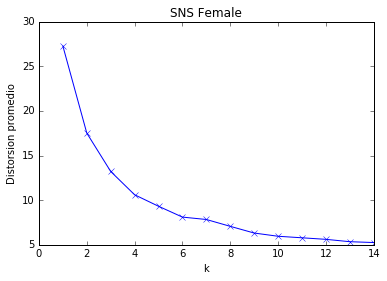

In [5]:
plot_distorsion(sns_data_F, "SNS Female", max_k = 15)

El método de la distorsión indica que el número de clusters para este conjunto de datos es 7. La posición de los centroides se puede obtener ahora como:

In [6]:
kmeans = KMeans(n_clusters = 7, n_init = 10).fit(sns_data_F)
kmeans.cluster_centers_

array([[  2.61138321e+01,   2.76811349e-01,   2.19557507e-01,
          2.62793447e-01,   1.92028374e-01,   1.98615099e-01,
          1.56223611e-01,   1.37307887e-01,   6.85694984e-02,
          9.22141530e-02,   1.33085627e-01,   4.00439115e-01,
          2.37628779e-01,   1.56054720e-01,   1.49467995e-01,
          1.15014356e-01,   5.03800034e-01,   3.43016382e-01,
          4.39115014e-02,   8.23847323e-01,   2.62455666e-01,
          4.78466475e-01,   2.70055734e-01,   1.10454315e-01,
          2.21246411e-02,   4.97213309e-01,   1.39503462e-01,
          9.94764398e-02,   2.81709171e-01,   4.42661713e-01,
          1.72268198e-01,   7.17784158e-02,   5.40449248e-02,
          1.90846141e-01,   1.25654450e-01,   9.60986320e-02,
          5.94494173e-02],
       [  4.45562385e+00,   2.18268090e-01,   1.84945541e-01,
          1.93141378e-01,   1.61652108e-01,   1.30702038e-01,
          1.31780438e-01,   1.05898846e-01,   5.80179014e-02,
          8.14191739e-02,   1.20565081e-01,

Ahora se analiza el grupo de hombres

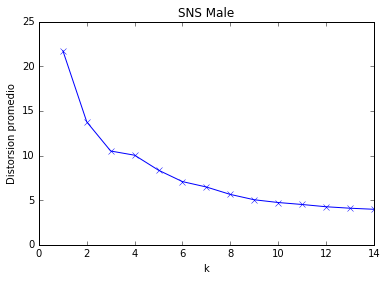

In [7]:
plot_distorsion(sns_data_M, "SNS Male", max_k = 15)

El método de la distorsión indica que el número de clusters para este conjunto de datos es 4. La posición de los centroides se puede obtener ahora como:

In [8]:
kmeans = KMeans(n_clusters = 4, n_init = 10).fit(sns_data_M)
kmeans.cluster_centers_

array([[  7.92305325e+00,   2.87473069e-01,   4.38288704e-01,
          1.91443521e-01,   5.84795322e-03,   2.73930440e-02,
          7.60233918e-02,   7.69467528e-03,   2.45614035e-01,
          8.46414281e-02,   1.92366882e-01,   6.06340412e-02,
          1.56355802e-01,   7.97168359e-02,   4.86303478e-02,
          5.07848569e-02,   1.89596799e-01,   3.05940289e-01,
          4.12434595e-02,   6.33425669e-01,   2.26839027e-01,
          4.03508772e-01,   1.67436134e-01,   1.08648815e-01,
          2.49307479e-02,   1.75130809e-01,   3.04709141e-02,
          2.00061557e-02,   1.11726685e-01,   3.93967375e-02,
          6.55586334e-02,   2.52385349e-02,   1.81594337e-02,
          1.69898430e-01,   1.03416436e-01,   6.58664204e-02,
          5.60172361e-02],
       [  4.13470919e+01,   3.50218887e-01,   4.65290807e-01,
          2.27642276e-01,   1.00062539e-02,   4.31519700e-02,
          8.81801126e-02,   6.87929956e-03,   2.85803627e-01,
          1.20700438e-01,   2.12007505e-01,

# 2. Componentes principales. (20 puntos)
En el archivo “concrete.csv” se encuentra los datos de diferentes mezclas de hormigón. Utilizar el análisis de componentes principales y obtener el número de componentes principales con los que se puede explicar el 50%, 75% y 90% de la varianza. Obtener el porcentaje de la varianza que explica la primera componente principal.

In [9]:
import pandas as pd

sns_data = pd.read_csv('concrete.csv', sep = ',')

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
pca.fit_transform(sns_data)

print "El 50% de la varianza de las mezclas se puede explicar con", (cumsum(pca.explained_variance_ratio_) > 0.50).tolist().index(True) + 1,"variables"
print "El 75% de la varianza de las mezclas se puede explicar con", (cumsum(pca.explained_variance_ratio_) > 0.75).tolist().index(True) + 1,"variables"
print "El 90% de la varianza de las mezclas se puede explicar con", (cumsum(pca.explained_variance_ratio_) > 0.90).tolist().index(True) + 1,"variables"
print
print "La primera componente principal explicar el %2.1f%%" % (pca.explained_variance_ratio_[0] * 100)

El 50% de la varianza de las mezclas se puede explicar con 2 variables
El 75% de la varianza de las mezclas se puede explicar con 3 variables
El 90% de la varianza de las mezclas se puede explicar con 5 variables

La primera componente principal explicar el 32.5%


# 3. Regresión de una función con Theano. (20 puntos)
Crear un conjunto de datos utilizando el siguiente código:

    trX = np.linspace(-1, 1, 101)
    trY = np.linspace(-1, 1, 101)
    for i in range(len(trY)):
        trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033

Ahora utilizar Theano para obtener los parámetros w_0 y w_1 del siguiente modelo
$$ y = \log(1 + w_0  |x|) + w_1  x, $$
utilizando los datos generados anteriormente.


Se crea el conjunto de datos indicado

In [11]:
trX = np.linspace(-1, 1, 101)
trY = np.linspace(-1, 1, 101)
for i in range(len(trY)):
    trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033

In [12]:
import theano
import theano.tensor as T

X = T.scalar()
Y = T.scalar()

def model(X, w0, w1):
    return T.log(1 + w0 * abs(X)) + w1 * X

w0 = theano.shared(np.asarray(0., dtype=theano.config.floatX))
w1 = theano.shared(np.asarray(0., dtype=theano.config.floatX))
y = model(X, w0, w1)

cost = T.mean(T.sqr(y - Y))
gradient0 = T.grad(cost = cost, wrt = w0)
gradient1 = T.grad(cost = cost, wrt = w1)
updates = [[w0, w0 - gradient0 * 0.01], [w1, w1 - gradient1 * 0.01]]

train = theano.function(inputs = [X, Y], outputs = cost, updates = updates)

for i in range(10):
    for x, y in zip(trX, trY):
        train(x, y)
        
    print "En el paso ", i, " w0 = ", w0.get_value(), " y w1 = ", w1.get_value()

En el paso  0  w0 =  0.200200648854  y w1 =  0.17042622407
En el paso  1  w0 =  0.305861063617  y w1 =  0.25725325323
En el paso  2  w0 =  0.370077242183  y w1 =  0.299800776342
En el paso  3  w0 =  0.411438084645  y w1 =  0.320150217974
En el paso  4  w0 =  0.438860446523  y w1 =  0.329610692819
En el paso  5  w0 =  0.457333123187  y w1 =  0.333826642823
En el paso  6  w0 =  0.469893044163  y w1 =  0.335572969951
En el paso  7  w0 =  0.478481027493  y w1 =  0.336194236297
En el paso  8  w0 =  0.484373807735  y w1 =  0.336330167367
En el paso  9  w0 =  0.488426241968  y w1 =  0.336277220829
